In [1]:
import sys
import xarray as xr
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, BoundaryNorm
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature, LAND
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import pickle

In [2]:
SWTpath='/home/565/mb0427/gdata-gb02/Australian_synoptic_weather_types/'

In [5]:
with open(SWTpath+'SWT_fields/SWT_WR_definitions.pkl', 'rb') as fp:
    SWTs = pickle.load(fp)

SWTnames = [SWTs[i]["WR"]+'-'+SWTs[i]["SWT"] for i in SWTs]
#WRnames = [SWTs[i]["WR"] for i in SWTs]
WRnames=['WH','CH','EH','TH','FH','WCT','COL','AM']

clusters= xr.open_dataset(SWTpath+"SWT_fields/SWT_data.nc")
cluster_series = clusters.clusterSeries#variables['clusterSeries'][:]
cluster_series.coords["mmdd"] = cluster_series["time"].dt.strftime("%m%d")

grouped = cluster_series.groupby("mmdd")

mmdds=list(grouped.groups.keys())
mmdds.remove("0229")

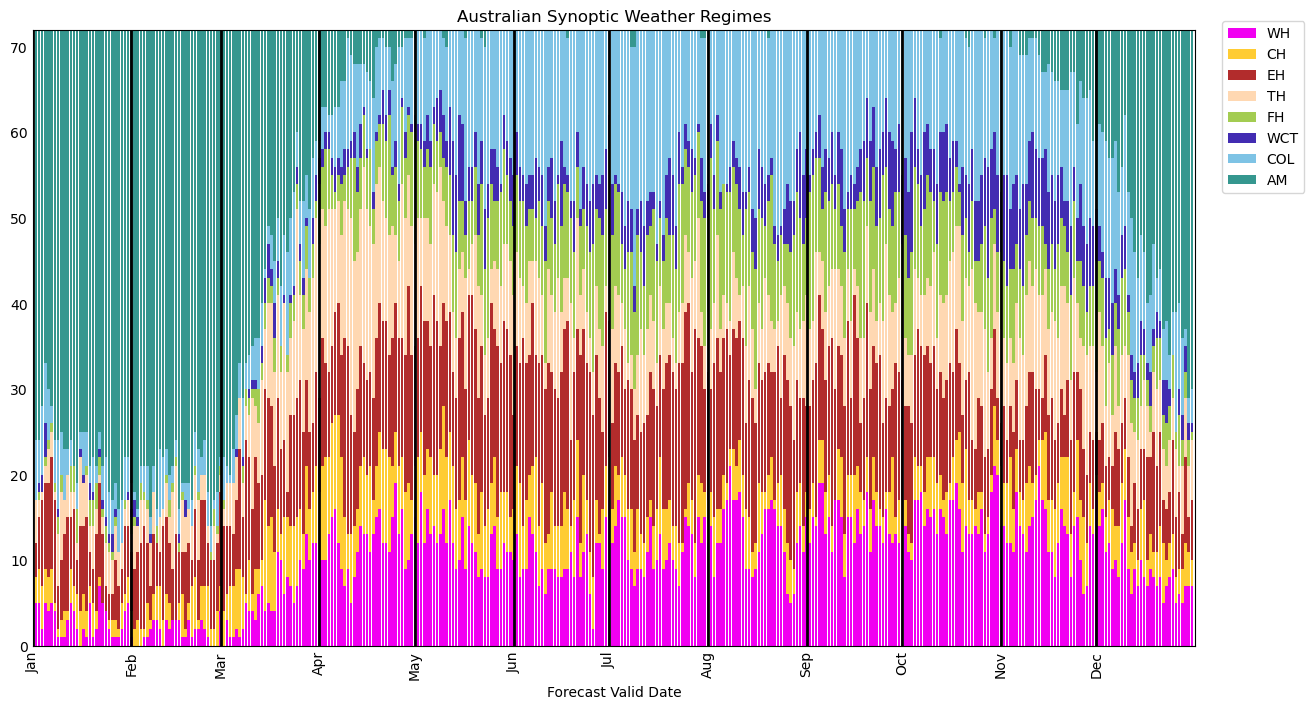

In [6]:
cluster_labels=np.zeros((72,len(mmdds)))
cluster_spread=np.zeros((len(WRnames),len(mmdds)))
for i,mmdd in enumerate(mmdds):
    selected_group = grouped.groups[mmdd]
    cluster_labels[:,i] = cluster_series.isel(time=selected_group)

for it,t in enumerate(range(cluster_labels.shape[1])):
    for im,m in enumerate(range(cluster_labels.shape[0])):
        label=cluster_labels[im,it]
        SWTindex=WRnames.index(SWTs[label]["WR"])
        cluster_spread[SWTindex,it]=cluster_spread[SWTindex,it]+1

datetimes=[datetime.strptime(mmdd,'%m%d') for mmdd in mmdds]
month_ticks = [i for i, date in enumerate(datetimes) if date.day == 1]
month_ticklabels=[datetimes[m].strftime('%b') for m in month_ticks]

fig, ax = plt.subplots(figsize=(15, 8))

# Plotting bars for each category in the groups
colors=[(241/255,0/255,241/255), #Pink WH
        (255/255,204/255,51/255), #Yellow CH
        (178/255,44/255,44/255), #Red EH
        (255/255,216/255, 178/255), #Brown TH
        (163/255,204/255,81/255), #Green FH 
        (66/255,44/255,178/255), #Purple WCT
        (126/255,195/255,229/255), #Blue COL
        (53/255,151/255,143/255), #BlueGreen AM
       ]

# Number of bars (columns)
num_bars = cluster_spread.shape[1]
x = np.arange(num_bars)
bottom = np.zeros(num_bars)

regticks=[4,6,11,14,17,19,25]
for i, (row, color) in enumerate(zip(cluster_spread, colors)):
    bars = plt.bar(x, row, bottom=bottom, color=color, label=WRnames[i])
    bottom += row

ax.legend(loc='upper right', bbox_to_anchor=(1.10, 1.025), ncols=1)

xticks=ax.set_xticks(month_ticks)
xticklabs=ax.set_xticklabels(month_ticklabels,rotation=90)
ax.set_xlabel('Forecast Valid Date')
ax.tick_params(length=0) 

ax.grid(axis='x',color='k', linestyle='-', linewidth=2)

ax.set_xlim([0,len(datetimes)])
ax.set_title('Australian Synoptic Weather Regimes')

plt.show()

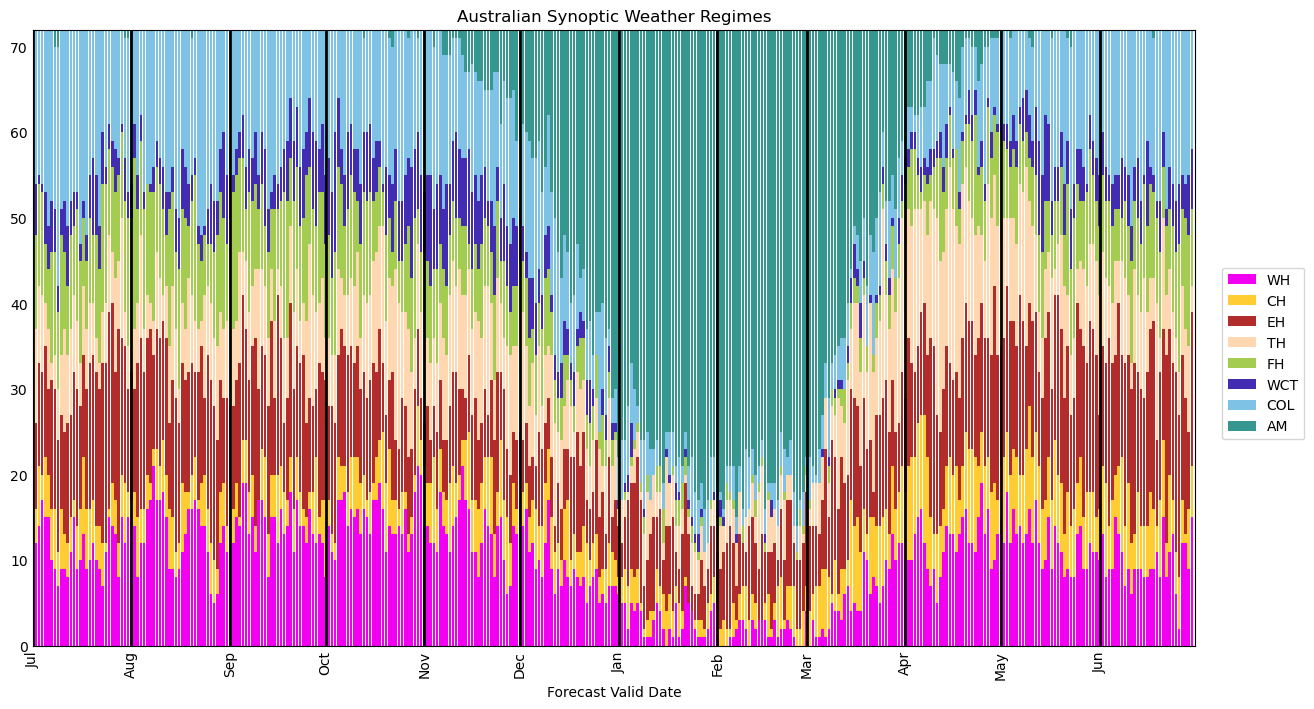

In [8]:
reorder_st=np.where(np.array(mmdds)=='0701')[0][0]
mmdds=mmdds[reorder_st::]+mmdds[0:reorder_st]

cluster_labels=np.zeros((72,len(mmdds)))
cluster_spread=np.zeros((len(WRnames),len(mmdds)))
for i,mmdd in enumerate(mmdds):
    selected_group = grouped.groups[mmdd]
    cluster_labels[:,i] = cluster_series.isel(time=selected_group)

for it,t in enumerate(range(cluster_labels.shape[1])):
    for im,m in enumerate(range(cluster_labels.shape[0])):
        label=cluster_labels[im,it]
        SWTindex=WRnames.index(SWTs[label]["WR"])
        cluster_spread[SWTindex,it]=cluster_spread[SWTindex,it]+1

datetimes=[datetime.strptime(mmdd,'%m%d') for mmdd in mmdds]
month_ticks = [i for i, date in enumerate(datetimes) if date.day == 1]
month_ticklabels=[datetimes[m].strftime('%b') for m in month_ticks]

fig, ax = plt.subplots(figsize=(15, 8))

# Plotting bars for each category in the groups
colors=[(241/255,0/255,241/255), #Pink WH
        (255/255,204/255,51/255), #Yellow CH
        (178/255,44/255,44/255), #Red EH
        (255/255,216/255, 178/255), #Brown TH
        (163/255,204/255,81/255), #Green FH 
        (66/255,44/255,178/255), #Purple WCT
        (126/255,195/255,229/255), #Blue COL
        (53/255,151/255,143/255), #BlueGreen AM
       ]

# Number of bars (columns)
num_bars = cluster_spread.shape[1]
x = np.arange(num_bars)
bottom = np.zeros(num_bars)

regticks=[4,6,11,14,17,19,25]
for i, (row, color) in enumerate(zip(cluster_spread, colors)):
    bars = plt.bar(x, row, bottom=bottom, color=color, label=WRnames[i])
    bottom += row

ax.legend(loc='upper right', bbox_to_anchor=(1.10, 0.625), ncols=1)

xticks=ax.set_xticks(month_ticks)
xticklabs=ax.set_xticklabels(month_ticklabels,rotation=90)
ax.set_xlabel('Forecast Valid Date')
ax.tick_params(length=0) 

ax.grid(axis='x',color='k', linestyle='-', linewidth=2)

ax.set_xlim([0,len(datetimes)])
ax.set_title('Australian Synoptic Weather Regimes')

plt.show()